In [22]:
import numpy as np
from scipy.special import rel_entr
from scipy.stats import entropy

In [42]:
drought1 = np.loadtxt("1982_0.25x0.25_degree.txt")
flood1 = np.loadtxt("1983_0.25x0.25_degree.txt")
normal1 = np.loadtxt("1984_0.25x0.25_degree.txt")

drought1 = drought1/np.sum(drought1)
flood1 = flood1/np.sum(flood1)
normal1 = normal1/np.sum(normal1)

In [76]:
drought2 = np.loadtxt("1987_0.25x0.25_degree.txt")
flood2 = np.loadtxt("1988_0.25x0.25_degree.txt")
normal2 = np.loadtxt("1985_0.25x0.25_degree.txt")

drought2 = drought2/np.sum(drought2)
flood2 = flood2/np.sum(flood2)
normal2 = normal2/np.sum(normal2)

In [3]:
normal = normal[normal>0]
drought = drought[drought>0]
flood = flood[flood>0]

In [66]:
norm_hist1, norm_bins1 = np.histogram(normal1, bins=np.arange(np.min(normal1), np.max(normal1), step=0.0001), density=True)
drut_hist1, drut_bins1 = np.histogram(drought1, bins=np.arange(np.min(drought1), np.max(drought1), step=0.0001), density=True)
flud_hist1, flud_bins1 = np.histogram(flood1, bins=np.arange(np.min(flood1), np.max(flood1), step=0.0001), density=True)

In [77]:
norm_hist2, norm_bins2 = np.histogram(normal2, bins=np.arange(np.min(normal2), np.max(normal2), step=0.0001), density=True)
drut_hist2, drut_bins2 = np.histogram(drought2, bins=np.arange(np.min(drought2), np.max(drought2), step=0.0001), density=True)
flud_hist2, flud_bins2 = np.histogram(flood2, bins=np.arange(np.min(flood2), np.max(flood2), step=0.0001), density=True)

In [68]:
P1 = norm_hist1[:20]
Q1 = drut_hist1[:20]
R1 = flud_hist1[:20]

In [78]:
P2 = norm_hist2[:20]
Q2 = drut_hist2[:20]
R2 = flud_hist2[:20]

In [70]:
norm_hist1.size, drut_hist1.size, flud_hist1.size

(27, 25, 22)

In [79]:
norm_hist2.size, drut_hist2.size, flud_hist2.size

(20, 37, 21)

In [48]:
# sum(rel_entr(P, Q)), sum(rel_entr(Q, P))
# sum(rel_entr(P, R)), sum(rel_entr(R, P))
# sum(rel_entr(Q, R)), sum(rel_entr(R, Q))
# sum(rel_entr(P,P))

In [ ]:
# What is a good way of representing this data? A matrix would be 6x6
# and too bulky ig?

In [84]:
a = np.zeros((6,6))
years = [R1, Q1, P1, P2, R2, Q2]

c = len(years)

for i in range(c):
    for j in range(c):
        a[i][j] = entropy(years[i],years[j])

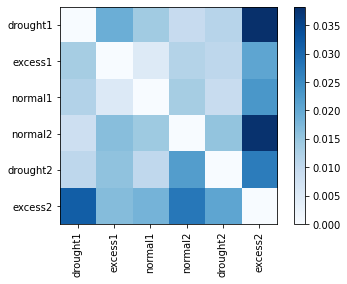

In [105]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots()

grid = ax.imshow(a, cmap="Blues")

ax.xaxis.set_ticks([0,1,2,3,4,5])
ax.yaxis.set_ticks([0,1,2,3,4,5])

ax.set_xticklabels(['drought1', 'excess1', 'normal1', 'normal2', 'drought2', 'excess2'], rotation='vertical')
ax.set_yticklabels(['drought1', 'excess1', 'normal1', 'normal2', 'drought2', 'excess2'])
fig.colorbar(grid, ax=ax)
plt.show()